## Fitting model to data

model answer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
%matplotlib inline

Read in data

In [2]:

am1_data = np.genfromtxt('Am1_L.txt')
# READ am2, am3

x1 = am1_data[:,0] # conc
y1 = am1_data[:,1] # response
# am2 am3 arrays

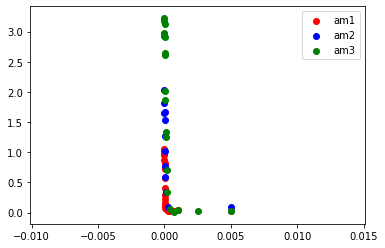

In [3]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x1,y1,c='red',label='am1')
ax.scatter(_,_,c='blue',label='am2') # FILL GAPS
ax.scatter(_,_,c='green',label='am3')
ax.legend() 
plt.show()

The linear scale makes it hard to see what's going on, so we replot on a semilog scale.

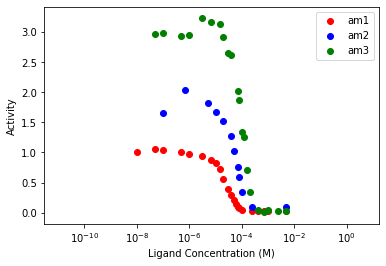

In [4]:
logfig = plt.figure()
logax = logfig.add_subplot(1, 1, 1)
logax.set_xscale('log')
logax.scatter(x1,y1,c='red',label='am1')
# Add am2, am3 stuff 
logax.set_xlabel('Ligand Concentration (M)')
logax.set_ylabel('Activity')
logax.legend() 
plt.show()

Log scale much better.

Now we write a function to predict activity from a concentration, given the model.

In [5]:
def predict_activity(L,x):
    """ Given ligand concentrations L, and parameters x, predict activities A"""
    a,N,E,Koff,Kon = x
    A = np.divide(a, (1+ np.exp(N* (E + np.log( (1 + np.divide(L,Koff))/(1 + np.divide(L,Kon)))))))
    return A

The loss function gives the sum of squared differences between the model and measured data. 

In [6]:
def loss(x,L,data):
    """sum of squared difference between measured and predicted activity, for an array of data, and parameters x)"""
    diff = ## write an equation here
    return diff

We now minimize the loss by adjusting the model parameters with the <code>scipy.optimize.minimize function</code>. This function takes the loss function, and other parameters.


In [7]:
#initial guess
x0_guess=np.array([2,3,-2,0.00005,0.0005])

# minimize provides a unified interface to all of scipy's solvers.
# We'll use the Nelder-Mead solver, we also need to hand it x1 and y1
res = scipy.optimize.minimize(loss, x0_guess, method='Nelder-Mead', args=(x1,y1))
x_fit = res['x'] # fitted parameter values

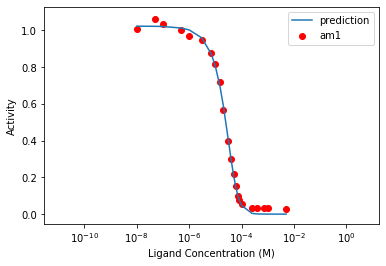

In [8]:
logfig = plt.figure()
logax = logfig.add_subplot(1, 1, 1)
logax.set_xscale('log')
logax.scatter(x1,y1,c='red',label='am1')
logax.plot(x1, predict_activity(x1,x_fit),label='prediction') # plot predictions from parameters
logax.set_xlabel('Ligand Concentration (M)')
logax.set_ylabel('Activity')
logax.legend() 
plt.show()

This fits for the am1 data. Can you do this for am2 and am3 too?